#### UCB Algorithm

![UCB Algorithm](../dataFiles/UCB_Algorithm.png)

- Objective is to optimise the 10 different Ads designs and decide which AD will convert the most
- Show ads to different online users, show the add and record whether the user clicked or did not click - 1 = clicked, 0 = not
- The dataset ensures that this is iterated for 10 uses

***Note***
- In reality the only way to simulate is to present the ads in real time however we have to make a simulation, the dataset is a simulation of which ad the user clicked on.
- For example user 1 would click on ad1, ad5, ad6.
- In reality we would have no prior knowledge of the user's options / choice of ads but the simulation allows for this.
##### Objective
- Each add has a click through rate and the goal is to figure out which ad is most frequently clicked on ad (converts the most) in the minimum possible rounds

#### importing the libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### importing the dataset

In [31]:
dataset = pd.read_csv('../dataFiles/Ads_CTR_Optimisation.csv')

##### Implementing UCB Algorithm

In [32]:
from math import sqrt, log
#requied variables
N = 600 # total no of users / rounds
d = 10 # no of adds
ads_selected = [] #full list of ads selected at each round
numbers_of_selections = [0]*d #no of times the ad i was selected up to round n - currently initialised to 10 zeros
sums_of_rewards = [0] * d #sum of rewards for the ad i up to round n
total_reward = 0 # total reward accumulated over the rounds

#Iterating through all the rounds
for n in range(0, N):
  #select an add with max UCB starting with ad 0
  ad = 0
  #max upper confidence bound to which all the others will be compared
  max_upper_bound = 0
  for i in range(0,d):
    #check if the current add has already been selected
    if (numbers_of_selections[i] >0):
      average_reward = sums_of_rewards[i]/numbers_of_selections[i] 
      #compute the confidence interval
      delta_i = sqrt(3/2*log(n+1)/numbers_of_selections[i] )
      
      #compute the UCB
      upper_bound = average_reward + delta_i 
    
    else:
      # Compute the max of the upper confidence bound
      #select adds that have not been selected yet -this is necessary to ensure that Ni(n) in step 2 is not 0
      upper_bound = 1e400 # this is 1 x 10 to the power of 400 - ensures that the add is selected
      
    if (upper_bound) > max_upper_bound:
      #update max_upper_bound
      max_upper_bound = upper_bound
      #select the add
      ad = i
  #updating the initial variables
  ads_selected.append(ad)
  numbers_of_selections[ad] +=1
  reward = dataset.values[n,ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward #gets values from the dataset
  total_reward = total_reward+ reward

##### Visualising the results

- plots number of times the ad was selected
- x axis has the different adds
- y axis has the number of times each add was selected

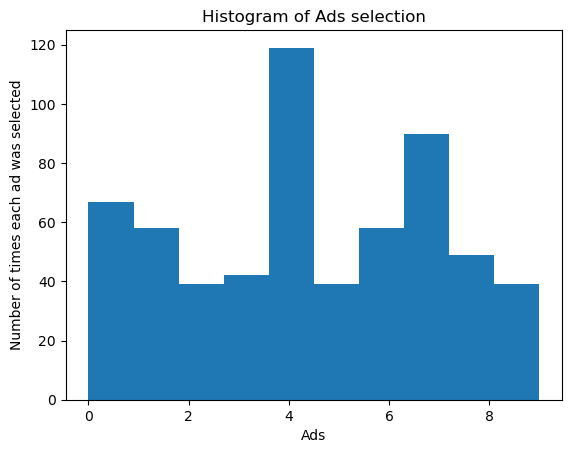

In [33]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### Analysis
- It is clear that Ad 5 was the most attractive
- The goal is to identify the add with as few round as possible

- experiment with lower values of N to see if the result still holds